In [1]:
import numpy as np
import pandas as pd
from numpy import random
import random
import matplotlib.pyplot as plt
from google.colab import files
uploaded=files.upload()

Saving A2Q2Data_train.csv to A2Q2Data_train.csv


In [2]:
data=pd.read_csv('A2Q2Data_train.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,0.58351,0.379390,0.839750,0.086861,0.611920,0.39203,0.189640,0.585090,0.89494,0.393850,0.062038,0.72616,0.707220,0.234570,0.469650,0.882640,0.79164,0.13159,0.036688,0.733460,0.84950,0.612550,0.610450,0.23291,0.485940,0.423040,0.216750,0.070333,0.39345,0.91542,0.01966,0.028469,0.43144,0.883380,0.987680,0.929500,0.895300,0.55043,0.045496,0.72057,...,0.534300,0.820490,0.584550,0.243980,0.985780,0.21629,0.403630,0.133550,0.797860,0.86640,0.878210,0.470610,0.984170,0.49901,0.494880,0.560650,0.250180,0.96773,0.425400,0.047506,0.62456,0.90287,0.27634,0.33391,0.45884,0.27900,0.70096,0.719810,0.171000,0.595790,0.51706,0.20535,0.829990,0.24995,0.319800,0.19674,0.958550,0.849480,0.923690,1.9741
1,0.86622,0.451350,0.934790,0.235810,0.504880,0.49742,0.117220,0.574880,0.71051,0.336890,0.608290,0.50955,0.019038,0.150970,0.030366,0.182380,0.72407,0.30008,0.256870,0.071868,0.22583,0.971380,0.028061,0.40178,0.929690,0.712280,0.935110,0.648440,0.88639,0.42374,0.56116,0.139260,0.65031,0.059234,0.350710,0.584530,0.096762,0.46007,0.001262,0.60890,...,0.551250,0.091007,0.412010,0.695830,0.644200,0.55454,0.007456,0.799660,0.590000,0.66175,0.758380,0.546640,0.070030,0.61851,0.915370,0.860320,0.893460,0.18328,0.327400,0.135820,0.80766,0.94360,0.32582,0.60013,0.76347,0.85428,0.22287,0.018455,0.148300,0.533590,0.27412,0.46065,0.655440,0.56656,0.490620,0.19920,0.320680,0.414190,0.830230,2.3354
2,0.39142,0.919950,0.138730,0.991810,0.543670,0.98449,0.340260,0.206470,0.40131,0.128990,0.126320,0.20168,0.279930,0.217640,0.440110,0.039892,0.14486,0.87135,0.107330,0.716590,0.27636,0.503620,0.113190,0.35442,0.020319,0.955620,0.313940,0.902470,0.69735,0.13239,0.76095,0.192730,0.68994,0.998050,0.047253,0.541340,0.322640,0.10621,0.597410,0.39388,...,0.583530,0.999320,0.512070,0.459310,0.936480,0.67159,0.178450,0.886770,0.012955,0.57806,0.782930,0.245450,0.778020,0.81165,0.620520,0.763380,0.456790,0.35245,0.229590,0.624210,0.38468,0.47702,0.97065,0.91283,0.51297,0.18225,0.42164,0.256070,0.097739,0.251740,0.27247,0.38911,0.799490,0.57753,0.866820,0.69741,0.628630,0.294790,0.542800,2.2053
3,0.79553,0.278540,0.228900,0.789290,0.492220,0.67084,0.769410,0.057104,0.20393,0.086936,0.064380,0.36584,0.253150,0.202030,0.067376,0.989730,0.30646,0.85280,0.524110,0.756550,0.31831,0.369100,0.450510,0.70262,0.829200,0.641070,0.252270,0.150120,0.81109,0.41140,0.26005,0.801630,0.82562,0.875920,0.234430,0.809200,0.730400,0.98323,0.287750,0.15789,...,0.979860,0.172000,0.001713,0.868900,0.072114,0.12187,0.490940,0.511780,0.364250,0.57088,0.282110,0.891310,0.758780,0.44876,0.640140,0.036639,0.629570,0.14766,0.572110,0.904750,0.47214,0.67075,0.67243,0.61736,0.94458,0.15247,0.10996,0.214430,0.602070,0.068362,0.24901,0.65976,0.943350,0.41246,0.927150,0.11015,0.101310,0.668010,0.345730,2.0400
4,0.65223,0.966650,0.179850,0.354060,0.840420,0.92891,0.014597,0.229530,0.43920,0.548940,0.834600,0.80267,0.445370,0.897530,0.804380,0.411270,0.99720,0.63410,0.565570,0.000590,0.65231,0.153830,0.948260,0.26342,0.157820,0.448350,0.740980,0.189670,0.86908,0.66328,0.15622,0.273410,0.34162,0.863620,0.354320,0.728260,0.576550,0.57002,0.689760,0.50665,...,0.614130,0.706590,0.122480,0.030009,0.030668,0.75171,0.631270,0.056698,0.833330,0.89095,0.068736,0.701080,0.596880,0.59140,0.585850,0.458830,0.695430,0.86650,0.638890,0.445720,0.24667,0.14579,0.20710,0.64127,0.99206,0.41792,0.75349,0.440330,0.181550,0.826180,0.93277,0.23674,0.027077,0.27111,0.233660,0.56356,0.047289,0.627920,0.979300,2.2053
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [3]:
uploaded=files.upload()

Saving A2Q2Data_test.csv to A2Q2Data_test.csv


In [134]:
df=data.values.tolist()
Z=np.array(df)
y=Z[:,-1]
X=np.delete(Z, -1, axis=1)
n,d=np.shape(X)
print (n,d)

10000 100


In [139]:
Wml=np.matmul(np.matmul(np.linalg.inv(np.matmul(X.T,X)),X.T),y)

In [140]:
W=np.random.random(100)
result=[]

In [141]:
for t in range(1,10000):
  step=1e-7
  id=random.sample(range(0,n), 100)
  Dy=np.row_stack([Z[id[i],:] for i in range(100)])
  ym=Dy[:,-1]
  D=np.delete(Dy, -1, axis=1)
  grad=np.subtract(np.matmul(np.matmul(D.T,D),W),np.matmul(D.T,ym))
  W=np.subtract(W,(grad*step))
  diff=0
  for i in range(d):
    diff+=pow((W[i]-Wml[i]),2)
  result.append(np.sqrt(diff))

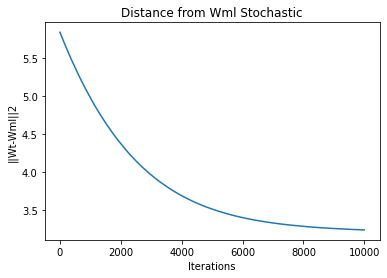

In [143]:
plt.title('Distance from Wml Stochastic')
plt.xlabel('Iterations')
plt.ylabel('||Wt-Wml||2')
plt.plot(result)